In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('Input feature.csv')
y = pd.read_csv('output_feature.csv')

In [3]:
X.head()

,Density_composition_average,IsBoron_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsTransitionMetal,Site1_NdValence
0,0.579069,-0.5856,1.029882,0.589536,0.217571,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,1.31768
1,0.748401,-0.5856,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,1.31768
2,0.804845,-0.5856,1.029882,1.371822,0.799435,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,1.31768
3,0.821973,-0.5856,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,1.31768
4,-0.860992,-0.5856,-0.998961,-0.437214,-0.613663,-1.684370,-1.368929,-1.228445,-1.429884,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,1.31768


In [4]:
y.head()

,Trg
0,0.534
1,0.608
2,0.609
3,0.577
4,0.515


Train-Test-Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
X_train.shape

(468, 17)

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building Artificial Neural Network

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [12]:
classifier = Sequential()

In [13]:
#input layer
classifier.add(Dense(units=17))

In [14]:
#first hidden layer
classifier.add(Dense(units=64, activation='relu', kernel_regularizer=l2(1e-4)))
classifier.add(Dropout(0.3))

In [15]:
#second hidden layer
classifier.add(Dense(units=64, activation='relu', kernel_regularizer=l2(1e-4)))
classifier.add(Dropout(0.3))

In [16]:
#third hidden layer
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dropout(0.2))

In [17]:
#output layer
classifier.add(Dense(units=1, activation='linear'))

In [18]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [19]:
tf.keras.optimizers.Adam(learning_rate= 0.005)

In [20]:
model_history = classifier.fit(X_train, y_train, validation_split=0.30, batch_size=16, epochs=350)

Epoch 1/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.3015 - mean_absolute_error: 0.4225 - val_loss: 0.0695 - val_mean_absolute_error: 0.2194
Epoch 2/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1896 - mean_absolute_error: 0.2925 - val_loss: 0.0495 - val_mean_absolute_error: 0.1738
Epoch 3/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0986 - mean_absolute_error: 0.2334 - val_loss: 0.0500 - val_mean_absolute_error: 0.1877
Epoch 4/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.2113 - val_loss: 0.0396 - val_mean_absolute_error: 0.1627
Epoch 5/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0612 - mean_absolute_error: 0.1754 - val_loss: 0.0370 - val_mean_absolute_error: 0.1549
Epoch 6/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0555 - mean_absolute_error: 0.1761 - val_loss: 0.0370 - val_mean_absolute_error: 0.1557
Epoch 7/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.1566 - val_lo

Training_MAE = 0.223
Validation_MAE = 0.240

In [21]:
classifier.history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

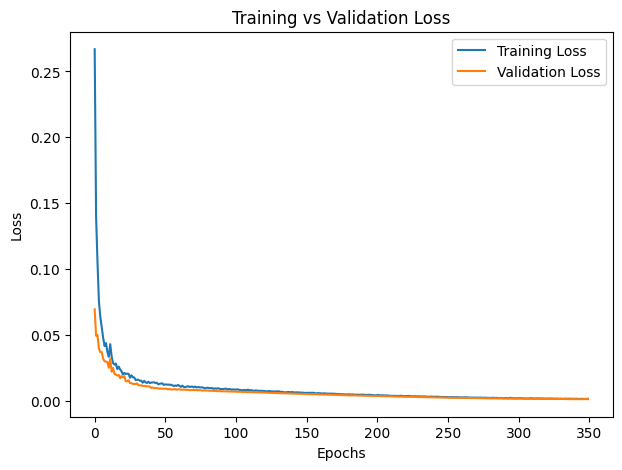

In [22]:
# summarize the history
plt.figure(figsize=(7,5))
plt.plot(classifier.history.history['loss'], label='Training Loss')
plt.plot(classifier.history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_vs_validation_loss.png', dpi=300)
plt.show()

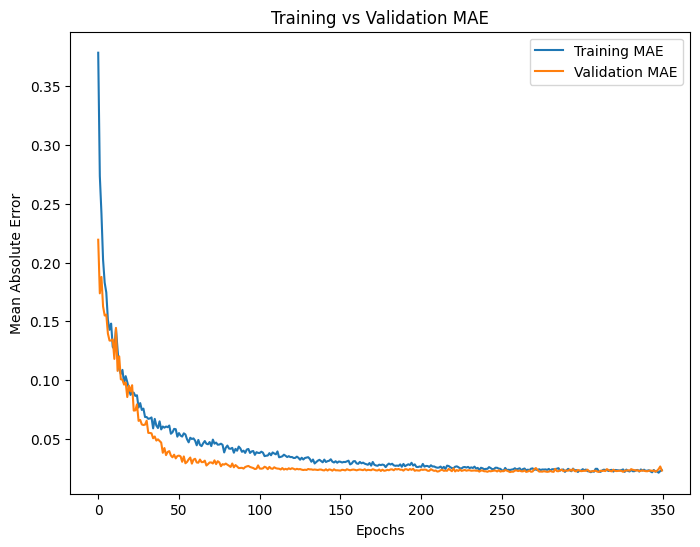

In [23]:
# Training vas Validation MAE

plt.figure(figsize=(8, 6))
plt.plot(model_history.history['mean_absolute_error'], label='Training MAE')
plt.plot(model_history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('training_vs_validation_MAE.png', dpi=300)
plt.show()

In [24]:
y_pred = classifier.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
y_pred = classifier.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MAE: 0.0266, MSE: 0.0013, RMSE: 0.0362
